In [1235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [1236]:
train=pd.read_csv("/content/train-chennai-sale.csv")

In [1237]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [1238]:
train.shape

(7109, 22)

In [1239]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [1240]:
train.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

##Filling Null values

In [1241]:
train["N_BEDROOM"].fillna(train["N_BEDROOM"].mode()[0],inplace=True)

In [1242]:
train["N_BATHROOM"].fillna(train["N_BATHROOM"].mode()[0],inplace=True)

In [1243]:
train["QS_OVERALL"].fillna(train["QS_OVERALL"].mean(),inplace=True)

In [1244]:
train.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

##PRT_ID

In [1245]:
train.PRT_ID.value_counts

<bound method IndexOpsMixin.value_counts of 0       P03210
1       P09411
2       P01812
3       P05346
4       P06210
         ...  
7104    P03834
7105    P10000
7106    P09594
7107    P06508
7108    P09794
Name: PRT_ID, Length: 7109, dtype: object>

In [1246]:
train.PRT_ID.describe()

count       7109
unique      7109
top       P03210
freq           1
Name: PRT_ID, dtype: object

##Correcting Spellings & Replacing Them with Correct Ones

##AREA

In [1247]:
train.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [1248]:
train.AREA.isnull().sum()

0

In [1249]:
train["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [1250]:
train['AREA'] = train['AREA'].replace({'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',
                                 'Karapakam':'Karapakkam','Adyr':'Adyar','Ann Nagar':'Anna Nagar','Ana Nagar':'Anna Nagar',
                                 'Velchery':'Velachery','KKNagar':'KK Nagar'})

In [1251]:
train.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [1252]:
train.AREA.isnull().sum()

0

##SALE_COND

In [1253]:
train["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [1254]:
train["SALE_COND"].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [1255]:
train["SALE_COND"]=train["SALE_COND"].replace({"AdjLand":"Adj Land","PartiaLl":"Partial","Partiall":"Partial","Normal Sale":"Normal Sale","Ab Normal":"AbNormal","Family":"Family"})

In [1256]:
train["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [1257]:
train["SALE_COND"].isnull().sum()

0

In [1258]:
train["SALE_COND"].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

##PARK_FACIL

In [1259]:
train["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [1260]:
train["PARK_FACIL"].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [1261]:
train["PARK_FACIL"]=train["PARK_FACIL"].replace({"Noo":"No"})

In [1262]:
train["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

##BUILDTYPE

In [1263]:
train["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [1264]:
train["BUILDTYPE"]=train["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"})

In [1265]:
train["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

##UTILITY_AVAIL

In [1266]:
train["UTILITY_AVAIL"].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [1267]:
#mapping={"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr":"NoSewr"}

In [1268]:
train["UTILITY_AVAIL"]=train["UTILITY_AVAIL"].replace({"All Pub":"AllPub","NoSeWa":"NoSewr","NoSewr ":"NoSewr"})

In [1269]:
train["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr'], dtype=object)

##STREET

In [1270]:
train["STREET"].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [1271]:
train["STREET"]=train["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"})

In [1272]:
train["STREET"].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

##Checking Unique values & Data Types

##MZZONE

In [1273]:
train["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

##Checking Statistical distribution of Data and Data Type

##INT_SQFT

In [1274]:
train["INT_SQFT"].value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

In [1275]:
train["INT_SQFT"].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [1276]:
train.INT_SQFT.isnull().sum()

0

In [1277]:
train["INT_SQFT"]=train["INT_SQFT"].astype(int)

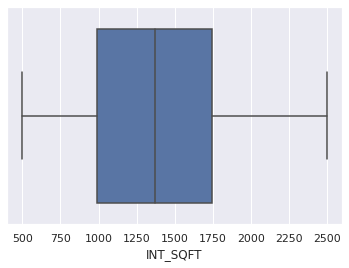

In [1278]:
sns.boxplot(train.INT_SQFT)

In [1279]:
train.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


##DIST_MAINROAD

In [1280]:
train["DIST_MAINROAD"].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [1281]:
train["DIST_MAINROAD"]=train["DIST_MAINROAD"].astype(int)

##	N_BEDROOM

In [1282]:
train["N_BEDROOM"].describe()

count    7109.000000
mean        1.636939
std         0.802881
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [1283]:
train["N_BEDROOM"]=train["N_BEDROOM"].astype(int)

##N_BATHROOM

In [1284]:
train["N_BATHROOM"].describe()

count    7109.000000
mean        1.213110
std         0.409534
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: N_BATHROOM, dtype: float64

In [1285]:
train["N_BATHROOM"]=train["N_BATHROOM"].astype(int)

##N_ROOM

In [1286]:
train["N_ROOM"].describe()

count    7109.000000
mean        3.688704
std         1.019099
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [1287]:
train["N_ROOM"]=train["N_ROOM"].astype(int)

##Converting Date to Date time 

##DATE_SALE & DATE_BUILD

In [1288]:
train["DATE_SALE"]=pd.to_datetime(train["DATE_SALE"])

In [1289]:
train["DATE_BUILD"]=pd.to_datetime(train["DATE_BUILD"])

##Deriving New Feature

##AGE_OF_HOUSE

In [1290]:
train["HOUSE_AGE"]=train["DATE_SALE"].dt.year-train["DATE_BUILD"].dt.year
train["HOUSE_AGE"]

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSE_AGE, Length: 7109, dtype: int64

##creating new target

In [1291]:
train["Total_price"]=train["REG_FEE"]+train["COMMIS"]+train["SALES_PRICE"]
train["Total_price"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_price, Length: 7109, dtype: int64

##Checking Distribution & Data Type

##QS_ROOMS

In [1292]:
train["QS_ROOMS"].describe().astype(int)

count    7109
mean        3
std         0
min         2
25%         2
50%         3
75%         4
max         5
Name: QS_ROOMS, dtype: int64

##QS_BATHROOM

In [1293]:
train["QS_BATHROOM"].describe().astype(int)

count    7109
mean        3
std         0
min         2
25%         2
50%         3
75%         4
max         5
Name: QS_BATHROOM, dtype: int64

##QS_BEDROOM

In [1294]:
train["QS_BEDROOM"].describe().astype(int)

count    7109
mean        3
std         0
min         2
25%         2
50%         3
75%         4
max         5
Name: QS_BEDROOM, dtype: int64

##QS_OVERALL

In [1295]:
train["QS_OVERALL"].describe().astype(int)

count    7109
mean        3
std         0
min         2
25%         3
50%         3
75%         3
max         4
Name: QS_OVERALL, dtype: int64

##	REG_FEE

In [1296]:
train["REG_FEE"].describe().astype(int)

count      7109
mean     376938
std      143070
min       71177
25%      272406
50%      349486
75%      451562
max      983922
Name: REG_FEE, dtype: int64

##COMMIS

In [1297]:
train["COMMIS"].describe().astype(int)

count      7109
mean     141005
std       78768
min        5055
25%       84219
50%      127628
75%      184506
max      495405
Name: COMMIS, dtype: int64

In [1298]:
train.SALES_PRICE.shape

(7109,)

In [1299]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313


In [1300]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE', 'Total_price'],
      dtype='object')

##plotting

In [1301]:
fig=px.histogram(train,x="AREA",color="AREA",title="AREA")#.update_xaxes(categoryorder="total ascending")
fig.show()
#Chrompet has highest records
#least amount of data is TNagar

In [1302]:
fig1=px.histogram(train,x="INT_SQFT",title="INT_SQFT").update_xaxes(categoryorder="total ascending")
fig1.show()
#(1500-1549)SQFT & (1600-1649)SQFT has the heighest count 339 & 340 respectively
#(2100-2149)SQFT has lowest count of 27

In [1303]:
fig2=px.histogram(train,x="DIST_MAINROAD",title="DIST_MAINROAD")
fig2.show()
#total 207 datapoints bulding has (70-74)distance  from main road

In [1304]:
train.N_BEDROOM.value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

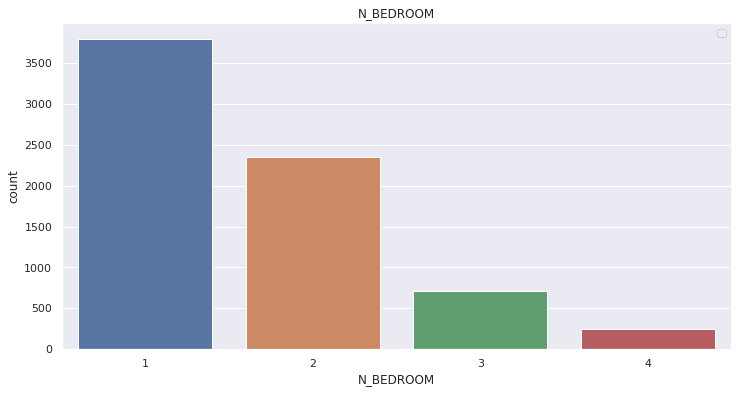

In [1305]:
plt.figure(figsize = (12, 6))
plt.legend("N_BEDROOM")
plt.title("N_BEDROOM")
sns.set_theme(style="darkgrid")
fig=sns.countplot(x="N_BEDROOM", data=train)
#majority of the house has 1 bedroom
#least amount of bedroom are 4

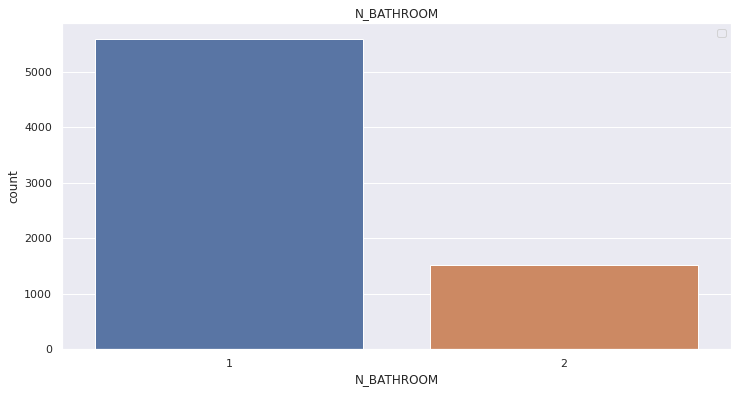

In [1306]:
plt.figure(figsize = (12, 6))
plt.legend("N_BATHROOM")
sns.set_theme(style="darkgrid")
plt.title("N_BATHROOM")
fig=sns.countplot(x="N_BATHROOM", data=train)
#most of the house has 1 bathroom

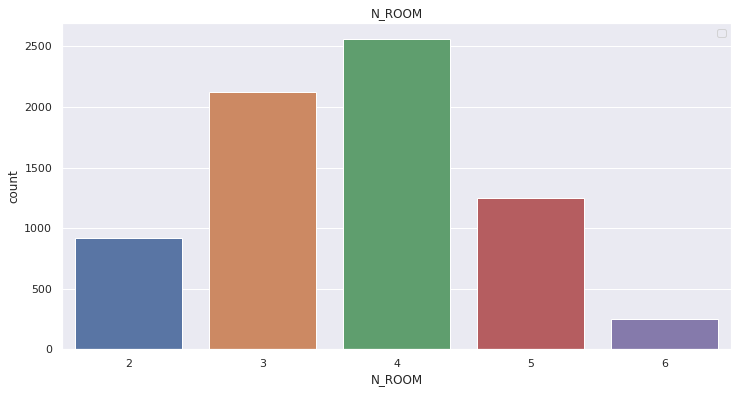

In [1307]:
plt.figure(figsize = (12, 6))
plt.legend("N_ROOM")
plt.title("N_ROOM")
sns.set_theme(style="darkgrid")
fig=sns.countplot(x="N_ROOM", data=train)
#most of the house has 4rooms

In [1308]:
fig3=px.bar(train,x="SALE_COND",color="AREA").update_xaxes(categoryorder="total ascending",title="SALE CONDITION")
fig3.show()
#adj land has heighest datapoints

In [1309]:
fig4=px.pie(train,values="Total_price",names="PARK_FACIL",title="SALES_PRICE")
fig4.show()
#53% of the sold house have PARKING FACILITY

In [1310]:
fig6=px.pie(train,values="Total_price",names="BUILDTYPE",title="BUILDTYPE")
fig6.show()
#here no of of commercial building is heighest followed by residencial building

In [1311]:
fig8=px.bar(train,x="UTILITY_AVAIL",color="AREA",title="UTILITY AVAILABLE")
fig8.show()

In [1312]:
# fig7=px.histogram(train,x="UTILITY_AVAIL",hover_name="AREA",color="UTILITY_AVAIL",animation_frame="AREA",range_y=[0,4000000000])
# fig7.show()

In [1313]:
fig9=px.bar(train,x="STREET",color="BUILDTYPE",title="STREET TYPE")
fig9.show()
#PAVED has most data points

In [1314]:
fig9=px.bar(train,x="MZZONE",color="AREA",title="MUNISPALITY ZONE")
fig9.show()

In [1315]:
fig=px.histogram(train,x="QS_ROOMS",color="AREA",title="QS_ROOMS")
fig.show()

In [1316]:
fig=px.histogram(train,x="QS_BATHROOM",color="AREA",title="QS_BATHROOM")

plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

In [1317]:
fig=px.histogram(train,x="QS_OVERALL",color="AREA",title="QS_OVERALL")
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

In [1318]:
fig=px.histogram(train,x="HOUSE_AGE",color="AREA",title="HOUSE_AGE")
plt.tight_layout()
fig.show()
#there are more 19 years old house followed by 5years
#there are only 13 house with 52 years old

<Figure size 432x288 with 0 Axes>

In [1319]:
train

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,Adj Land,No,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49,5668827
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9,11370222
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28,8835792
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32,9051448


In [1320]:
train.QS_ROOMS.describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

##EDA

##feature vs target

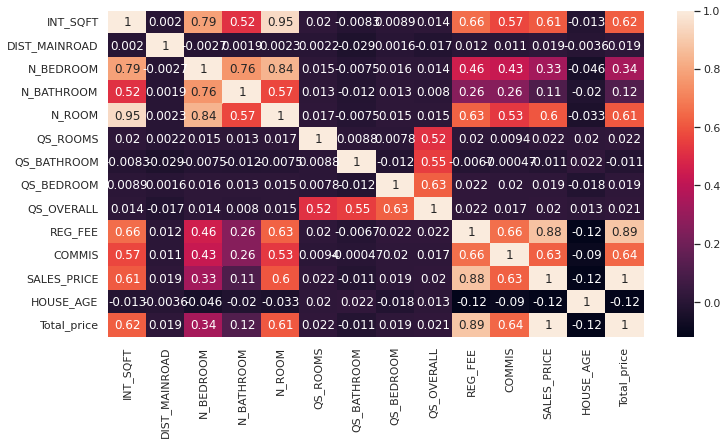

In [1321]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),annot=True)

In [1322]:
# train.hist(figsize=(12,12))
# plt.xticks( rotation='vertical')


In [1323]:
x=pd.DataFrame(train.groupby("AREA")["Total_price"].mean())
y=train["AREA"].unique()
y=sorted(y)

data={"AREA":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1324]:
fig=px.bar(temp,x="AREA",y="Avg_price",color="AREA",title="AREA vs Avgerage Price")
fig

1.there is a linear relation between the ft and target

2.we need to go for label encoding

In [1325]:
fig=px.scatter(train,x="INT_SQFT",y="Total_price",color="INT_SQFT",title="SQFT vs Total_price")#update_xaxes(categoryorder="total ascending")
fig.show()

1.there is a linear relation between the feature and target 


2.no encoding required

In [1326]:
fig=px.scatter(train,x="DIST_MAINROAD",y="Total_price",color="DIST_MAINROAD",title="distance from mainroad vs Total_price")#update_xaxes(categoryorder="total ascending")
fig.show()

1.there is linear relation between feature and target


In [1327]:
x=pd.DataFrame(train.groupby("N_BEDROOM")["Total_price"].mean())
y=train["N_BEDROOM"].unique()
y=sorted(y)

data={"N_BEDROOM":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1328]:
fig=px.bar(temp,x="N_BEDROOM",y="Avg_price",color="N_BEDROOM",title="Avgerage Price vs no of bedroom")
fig

1.there is a clear linear correlation(0.34) between target and feature




In [1329]:
x=pd.DataFrame(train.groupby("N_BATHROOM")["Total_price"].mean())
y=train["N_BATHROOM"].unique()
y=sorted(y)

data={"N_BATHROOM":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1330]:
fig=px.bar(temp,x="N_BATHROOM",y="Avg_price",color="N_BATHROOM",title="Avgerage Price vs no of bedroom")
fig

1.no encoding required

In [1331]:
x=pd.DataFrame(train.groupby("N_ROOM")["Total_price"].mean())
y=train["N_ROOM"].unique()
y=sorted(y)

data={"N_ROOM":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1332]:
fig=px.bar(temp,x="N_ROOM",y="Avg_price",color="N_ROOM",title="Avgerage Price vs no of N_ROOM")
fig

1.there is a corr of (0.61) between the feature and target

2.no encoding required

In [1333]:
x=pd.DataFrame(train.groupby("SALE_COND")["Total_price"].mean())
y=train["SALE_COND"].unique()
y=sorted(y)

data={"SALE_COND":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1334]:
fig=px.bar(temp,x="SALE_COND",y="Avg_price",color="SALE_COND",title="Avgerage Price vs SALES CONDITION")
fig

1.there is a order and clear linear relation between the target and feature

2.here we need to go for label encoding

In [1335]:
x=pd.DataFrame(train.groupby("PARK_FACIL")["Total_price"].mean())
y=train["PARK_FACIL"].unique()
y=sorted(y)

data={"PARK_FACIL":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1336]:
fig=px.bar(temp,x="PARK_FACIL",y="Avg_price",color="PARK_FACIL",title="Avgerage Price vs parking facility")
fig

1.here we can go for label encoding

In [1337]:
x=pd.DataFrame(train.groupby("BUILDTYPE")["Total_price"].mean())
y=train["BUILDTYPE"].unique()
y=sorted(y)

data={"BUILDTYPE":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1338]:
fig=px.bar(temp,x="BUILDTYPE",y="Avg_price",color="BUILDTYPE",title="Avgerage Price vs building type")
fig

1.no linear pattern

2.one hot encoding required

In [1339]:
x=pd.DataFrame(train.groupby("UTILITY_AVAIL")["Total_price"].mean())
y=train["UTILITY_AVAIL"].unique()
y=sorted(y)

data={"UTILITY_AVAIL":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1340]:
fig=px.bar(temp,x="UTILITY_AVAIL",y="Avg_price",color="UTILITY_AVAIL",title="Avgerage Price vs availabel utilities")
fig

1.label enoding

In [1341]:
x=pd.DataFrame(train.groupby("STREET")["Total_price"].mean())
y=train["STREET"].unique()
y=sorted(y)

data={"STREET":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1342]:
fig=px.bar(temp,x="STREET",y="Avg_price",color="STREET",title="Avgerage Price vs availabel STREET")
fig

1.no relation between the data

2.one hot encoding required

In [1343]:
x=pd.DataFrame(train.groupby("MZZONE")["Total_price"].mean())
y=train["MZZONE"].unique()
y=sorted(y)

data={"MZZONE":y,"Avg_price":x["Total_price"]}
temp=pd.DataFrame(data)
temp.sort_values("Avg_price",inplace=True)

In [1344]:
fig=px.bar(temp,x="MZZONE",y="Avg_price",color="MZZONE",title="Avgerage Price vs availabel municpal zone")
fig

In [1345]:
fig=px.histogram(train,x="HOUSE_AGE",y="Total_price",color="HOUSE_AGE",title="Total Price vs Age of house").update_xaxes(categoryorder="total ascending")
fig

1.no encoding for continious value

##ENCODING

##label encoding

In [1346]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE', 'Total_price'],
      dtype='object')

In [1347]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [1348]:
train["AREA"]=train["AREA"].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4,'Anna Nagar':5, 'T Nagar':6})

In [1349]:
train.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [1350]:
train["SALE_COND"]=train["SALE_COND"].map({'Partial':0, 'Family':1, 'AbNormal':2,'Normal Sale':3, 'Adj Land':4})

In [1351]:
train["PARK_FACIL"]=train["PARK_FACIL"].map({"No":0,"Yes":1})

In [1352]:
train.UTILITY_AVAIL.value_counts()

NoSewr    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [1353]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train["UTILITY_AVAIL"]= label_encoder.fit_transform(train["UTILITY_AVAIL"])

In [1354]:
train.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [1355]:
train["STREET"]=train["STREET"].map({'No Access':0, 'Paved':1, 'Gravel':2})

In [1356]:
train.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [1357]:
train["MZZONE"]=train["MZZONE"].map({'A':0,'C':1,'I':2,'RH':3,'RL':4, 'RM':5})

In [1358]:
train.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSE_AGE,Total_price
0,P03210,0,1004,2011-04-05,131,1,1,3,2,1,...,0,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,5,1986,2006-12-19,26,2,1,5,2,0,...,3,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,1,909,2012-04-02,70,1,1,3,2,1,...,4,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,3,1855,2010-03-13,14,3,2,5,1,0,...,2,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,0,1226,2009-05-10,84,1,1,3,2,1,...,1,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313


##One Hot Encoding

In [1359]:
train1=pd.get_dummies(train["BUILDTYPE"]).astype(int)

adding train1 to train

In [1360]:
train=pd.concat([train,train1],axis=1)

In [1361]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   int64         
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   int64         
 9   PARK_FACIL     7109 non-null   int64         
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   int64         
 13  STREET         7109 non-null   int64         
 14  MZZONE         7109 non-null   int64         
 15  QS_ROOMS       7109 n

In [1362]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSE_AGE', 'Total_price', 'Commercial', 'House',
       'Others'],
      dtype='object')

##Dropping Unwanted Columns

In [1363]:
train=train.drop(columns = ['PRT_ID','DATE_SALE','DIST_MAINROAD','DATE_BUILD','BUILDTYPE','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE'],axis=1)
train.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,HOUSE_AGE,Total_price,Commercial,House,Others
0,0,1004,1,1,3,2,1,0,1,0,44,8124400,1,0,0
1,5,1986,2,1,5,2,0,0,2,3,11,22781941,1,0,0
2,1,909,1,1,3,2,1,1,2,4,20,13672408,1,0,0
3,3,1855,3,2,5,1,0,2,1,2,22,10063653,0,0,1
4,0,1226,1,1,3,2,1,0,2,1,30,7717313,0,0,1


In [1364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   AREA           7109 non-null   int64
 1   INT_SQFT       7109 non-null   int64
 2   N_BEDROOM      7109 non-null   int64
 3   N_BATHROOM     7109 non-null   int64
 4   N_ROOM         7109 non-null   int64
 5   SALE_COND      7109 non-null   int64
 6   PARK_FACIL     7109 non-null   int64
 7   UTILITY_AVAIL  7109 non-null   int64
 8   STREET         7109 non-null   int64
 9   MZZONE         7109 non-null   int64
 10  HOUSE_AGE      7109 non-null   int64
 11  Total_price    7109 non-null   int64
 12  Commercial     7109 non-null   int64
 13  House          7109 non-null   int64
 14  Others         7109 non-null   int64
dtypes: int64(15)
memory usage: 833.2 KB


In [1365]:
train.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Total_price', 'Commercial', 'House', 'Others'],
      dtype='object')

##DATA SPLITING

In [1366]:
X = train[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others']].values #2d array will convert these features to train dataset
y = train['Total_price'].values #converting target

In [1367]:
from sklearn.model_selection import train_test_split  #spliting the dataset into train and test dataset. 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

##DATA SCALING

In [1368]:
from sklearn.preprocessing import StandardScaler # Scaling for linear Regression is not strictly required for better practice we are doing standardscaling
scaler = StandardScaler() #initialise to a variable for standard scaler
scaler.fit(X_train,y_train) #fitting the train datset.we dont fit test dataset as we are going to use the test dataset directly for evalution
X_train_scaled = scaler.transform(X_train) #transform of train data
X_test_scaled = scaler.transform(X_test) #transform of test data

In [1369]:
r2_value = []
cross_vali = []

##MODEL FITTING FOR REGRESSION MODELS

##Linear Regression

In [1370]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [1371]:
y_pred = regressor.predict(X_test_scaled)

In [1372]:
print( 'intercept:', regressor.intercept_)

intercept: 11405453.601399884


In [1373]:
print( 'Coefficient:', regressor.coef_)

Coefficient: [ 1.06544559e+06  7.95414840e+05 -1.27038725e+06  9.50270264e+04
  1.75582431e+06  2.24650676e+05  5.42307025e+05 -1.02659478e+05
  4.16353674e+05  9.18428129e+05 -2.39604553e+05 -1.49263991e+18
 -1.50918604e+18 -1.49345656e+18]


#Loss Function & Evaluation Metrics in Linear regression

In [1374]:
#Loss Function and Evalution Metrics for Test Dataset
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 825977.9430233369
Mean Squared Error: 1177210805072.6448
R2- SCORE: 0.9266030290551364


In [1375]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,8405919,8.150414e+06
1,12895904,1.416590e+07
2,16688276,1.727067e+07
3,14541031,1.377115e+07
4,17329961,1.667598e+07
...,...,...
1417,10621328,1.250318e+07
1418,18668565,1.806990e+07
1419,18135236,1.800744e+07
1420,17476610,1.771304e+07


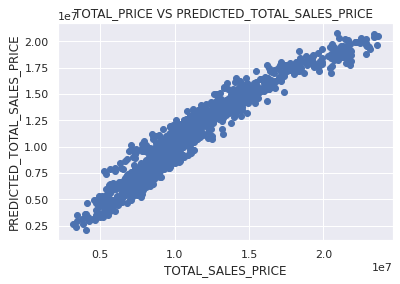

In [1376]:
plt.scatter(y_test, y_pred)
plt.xlabel("TOTAL_SALES_PRICE")
plt.ylabel("PREDICTED_TOTAL_SALES_PRICE")
plt.title("TOTAL_PRICE VS PREDICTED_TOTAL_SALES_PRICE ")
plt.show()

##Cross validation Score for Linear Regression

In [1377]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [1378]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9256945119925772

##Feature Selection in Linear Regression using RFE and SFS

In [1379]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', True),
 ('Others', True)]

In [1380]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', True),
 ('Others', True)]

##RANDOM FORSEST REGRESSOR

In [1381]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [1382]:
# Model prediction on test data
y_pred = reg.predict(X_test_scaled)

##Loss Function & Evaluation Metrics for Random Forest Regressor

In [1383]:
print('R^2:',metrics.r2_score(y_test,y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))

R^2: 0.9893864934304489
MAE: 326640.12474683544
MSE: 170229567413.22263


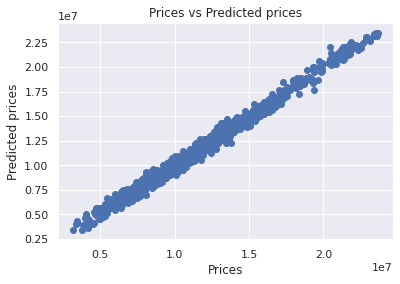

In [1384]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

#Cross Validation Score for Random forest Regressor 

In [1385]:
from sklearn.model_selection import cross_validate
regressor = RandomForestRegressor()

In [1386]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.9897921506447199

##Feature Selection for Random Forest Regression Using RFE & SFS

In [1387]:
from sklearn.feature_selection import RFE
estimator = RandomForestRegressor()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', False),
 ('Others', False)]

In [1388]:
estimator = RandomForestRegressor()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', False),
 ('Others', False)]

##KNN REGRESSOR

In [1389]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [1390]:
y_pred = neigh.predict(X_test)

In [1391]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,8405919,10462964.0
1,12895904,10591360.5
2,16688276,11194019.5
3,14541031,12428071.5
4,17329961,15068188.0
...,...,...
1417,10621328,11369736.5
1418,18668565,12413658.0
1419,18135236,15536247.0
1420,17476610,11850762.5


##Loss Function & Evaluation Metrics for KNN Regressor

In [1392]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred)) # 0 - 1
r2_value.append(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2497771.4405766525
Mean Squared Error: 10153000417806.66
R2- SCORE: 0.36697873188230046


##Cross Validation Score for KNN Regressor

In [1393]:
KNReg = KNeighborsRegressor(n_neighbors=2)

In [1394]:
cv_results = cross_validate(KNReg, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.34550025694526065

##Feature Selection for KNN Regressor Using RFE & SFS

In [1395]:
estimator = KNeighborsRegressor(n_neighbors=2)
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train, y_train)
sfs.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', False),
 ('Others', False)]

##DECISION TREE REGRESSOR 

In [1396]:
from sklearn.tree import DecisionTreeRegressor 
deci_regressor = DecisionTreeRegressor(random_state = 0) 
deci_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [1397]:
y_pred = deci_regressor.predict(X_test)

In [1398]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,8405919,8569896.0
1,12895904,12116132.0
2,16688276,16255100.0
3,14541031,13901784.0
4,17329961,17559459.0
...,...,...
1417,10621328,10928662.0
1418,18668565,18569776.0
1419,18135236,17744002.0
1420,17476610,17976166.0


##Loss Function & Evaluation Metrics for Decision Tree

In [1399]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 496386.3966244726
Mean Squared Error: 400548258038.6076
R2- SCORE: 0.9750265383815763


##Cross validation Score for Decision Tree

In [1400]:
detree = DecisionTreeRegressor(random_state = 0)

In [1401]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.975455116092227

##Feature selection for Decision Tree using RFE & SFS

In [1402]:
estimator = DecisionTreeRegressor(random_state = 0) 
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', False),
 ('Others', False)]

In [1403]:
estimator = DecisionTreeRegressor(random_state = 0) 
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit(X_train, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
            'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'HOUSE_AGE',
       'Commercial', 'House', 'Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('N_BEDROOM', False),
 ('N_BATHROOM', False),
 ('N_ROOM', False),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', False),
 ('HOUSE_AGE', False),
 ('Commercial', True),
 ('House', False),
 ('Others', False)]

##XG BOOST

In [1404]:
import warnings
warnings.filterwarnings('ignore')

In [1405]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.7]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  # model.score(X_test, y_test) # scoring the model - r2 squared
  # print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.7  Train score :  0.9976713834490744  Cross-Val score :  0.9960743369518272


In [1409]:
y_pred = model.predict(X_test)

In [1410]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
0,8405919,8261393.5
1,12895904,12695844.0
2,16688276,16305972.0
3,14541031,14492590.0
4,17329961,17217918.0
...,...,...
1417,10621328,10501182.0
1418,18668565,18731156.0
1419,18135236,18315974.0
1420,17476610,17657104.0


##Loss Function & Evaluation Metrics For XG Boost

In [1413]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
r2_value.append(metrics.r2_score(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 179804.8206751055
Mean Squared Error: 52124559299.94893
R2- SCORE: 0.9967501277188702


##Cross Validation Score XG Boost

In [1415]:
model = xgb.XGBRegressor(random_state = 0)

In [1416]:
cv_results = cross_validate(detree, X, y, cv=10, scoring = "r2")
cross_vali.append(cv_results['test_score'].mean())
cv_results['test_score'].mean()

0.975455116092227

##Conclusion

In [1417]:
r2_value

[0.9266030290551364,
 0.9893864934304489,
 0.36697873188230046,
 0.9750265383815763,
 0.9967501277188702]

In [1418]:
cross_vali

[0.9256945119925772,
 0.9897921506447199,
 0.34550025694526065,
 0.975455116092227,
 0.975455116092227]

##Compairing R^2 Value & Crossiing Validation score

In [1419]:
result = {'R2 Score' : r2_value,'Cross Validation Mean Score':cross_vali}
ind = ['Linear Regression','Random Forest','KNN','Decision Tree','XG Boost']
df_result = pd.DataFrame(result, index=ind)
df_result

,R2 Score,Cross Validation Mean Score
Linear Regression,0.926603,0.925695
Random Forest,0.989386,0.989792
KNN,0.366979,0.345500
Decision Tree,0.975027,0.975455
XG Boost,0.996750,0.975455


##Here we concluded XG-Boost gives us highest R^2 score(99%) and Random Forest Gives us Highest CV score(98%).